In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
df = pd.read_csv('Admission_Predict.csv')

In [64]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [65]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [67]:
df.drop(columns=['Serial No.'], inplace=True)

In [68]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [69]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Chance of Admit '])
y = df['Chance of Admit ']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [71]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [72]:
model = Sequential()

model.add(Dense(7, activation='relu', input_dim=7))

model.add(Dense(7, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(7, activation='relu'))

model.add(Dense(1, activation='linear'))

In [73]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 7)                 56        
                                                                 
 dense_15 (Dense)            (None, 7)                 56        
                                                                 
 dense_16 (Dense)            (None, 7)                 56        
                                                                 
 dense_17 (Dense)            (None, 7)                 56        
                                                                 
 dense_18 (Dense)            (None, 7)                 56        
                                                                 
 dense_19 (Dense)            (None, 7)                 56        
                                                                 
 dense_20 (Dense)            (None, 1)                

In [74]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [75]:
hist = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
8/8 [==============================] - 2s 63ms/step - loss: 0.3001 - val_loss: 0.3305
Epoch 2/100
8/8 [==============================] - 0s 6ms/step - loss: 0.2514 - val_loss: 0.2864
Epoch 3/100
8/8 [==============================] - 0s 7ms/step - loss: 0.2085 - val_loss: 0.2405
Epoch 4/100
8/8 [==============================] - 0s 8ms/step - loss: 0.1638 - val_loss: 0.1922
Epoch 5/100
8/8 [==============================] - 0s 7ms/step - loss: 0.1245 - val_loss: 0.1469
Epoch 6/100
8/8 [==============================] - 0s 7ms/step - loss: 0.0894 - val_loss: 0.1046
Epoch 7/100
8/8 [==============================] - 0s 8ms/step - loss: 0.0592 - val_loss: 0.0713
Epoch 8/100
8/8 [==============================] - 0s 7ms/step - loss: 0.0396 - val_loss: 0.0493
Epoch 9/100
8/8 [==============================] - 0s 7ms/step - loss: 0.0280 - val_loss: 0.0370
Epoch 10/100
8/8 [==============================] - 0s 7ms/step - loss: 0.0224 - val_loss: 0.0298
Epoch 11/100
8/8 [==========

In [76]:
y_pred = model.predict(X_test)

3/3 [==============================] - 0s 1ms/step


In [77]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.7394946748272092

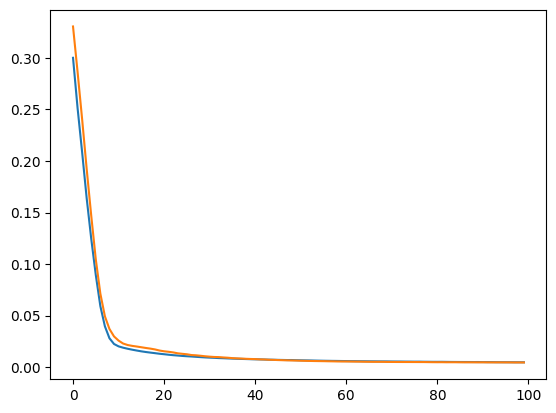

In [78]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

plt.show()